# Housing Company- Advanced Regression

## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

So that they can understand the pricing dynamics of new area.

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing the dataset
housing=pd.read_csv("train.csv")

In [4]:
# Changing default display options for better visibility of data
pd.options.display.max_colwidth = 255
pd.options.display.max_rows=500

## Understanding the data

In [5]:
#view 5 records
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

So we have total of 1460 records and 80 columns to analyze, with 3 columns as float types, 35 as integer and 43 as object types

In [7]:
# count the number of null values present in the data
round(housing.isnull().sum()/len(housing.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [8]:
#dropping column with null values greater than 85%
#also dropping column ID, since it is just a seq no
housing.drop(['PoolQC','MiscFeature','Alley','Id'],axis=1, inplace=True)

In [9]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,NaN,0,12,2008,WD,Normal,250000


In [10]:
#describing the data frame
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

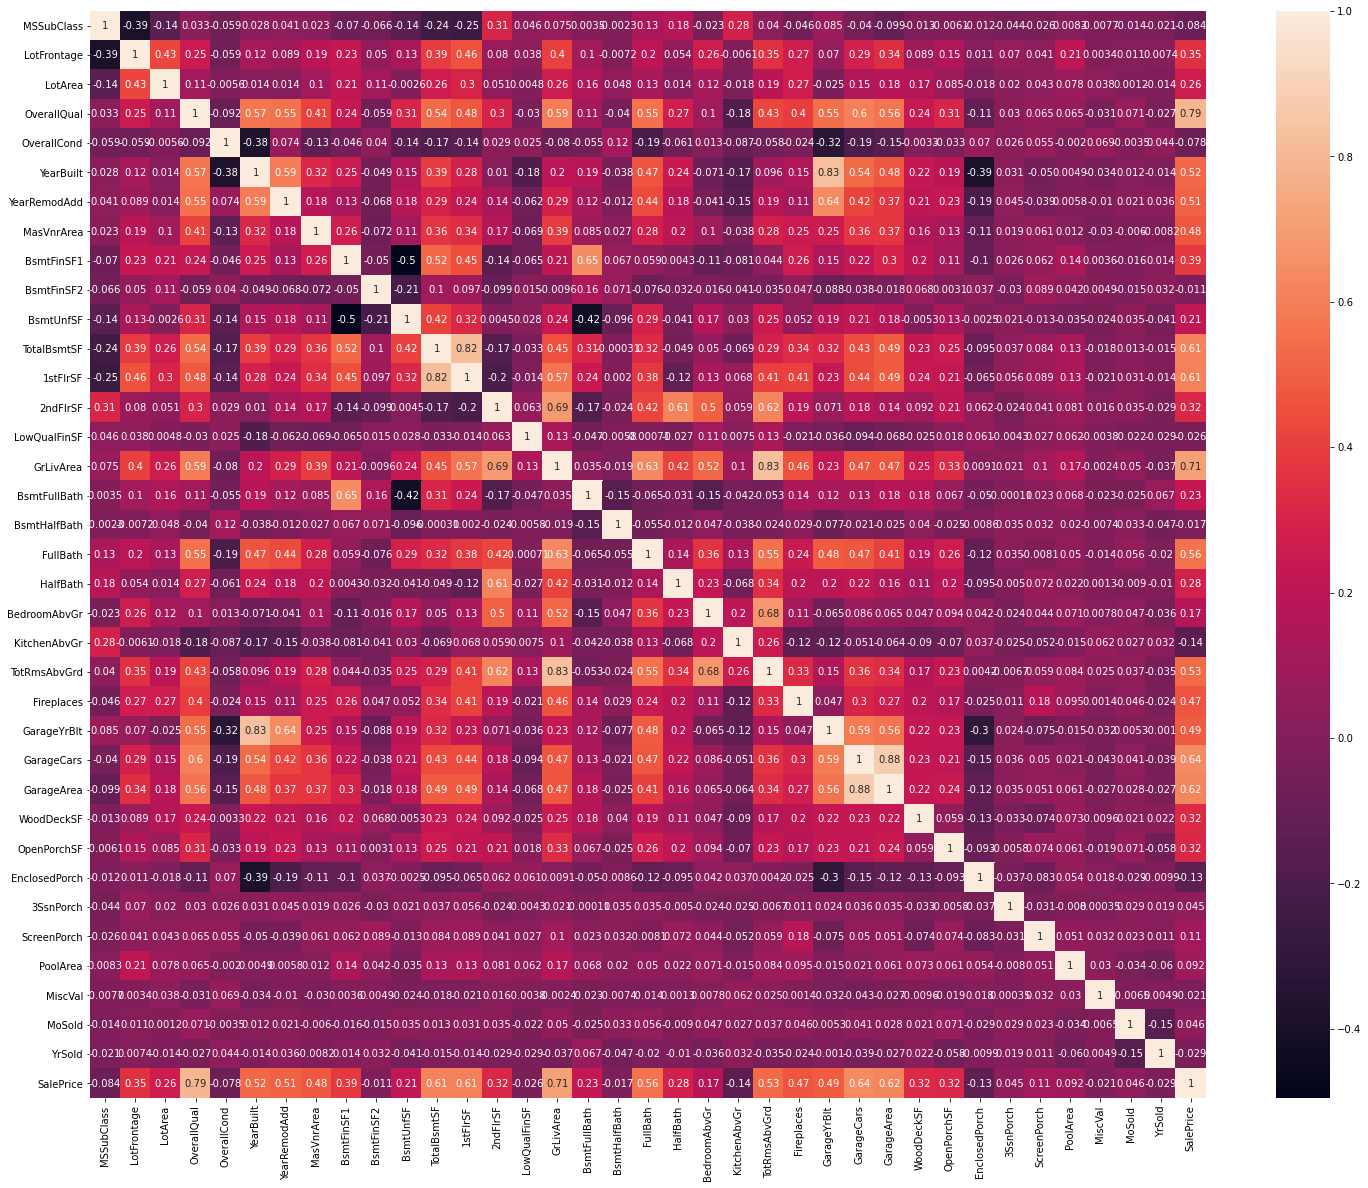

In [11]:
#plotting heatmap to check
plt.subplots(figsize=(25,20))
sns.heatmap(housing.corr(), annot=True)

From the pairplot given above we can see that some of the numerical colums are highly related with the sales price
- Overall Quality
- Year Built
- Year removeadd
- MasVnrArea
- TotalBsmn SF
- 1st Foor SF
- Gr ving Area
- Fullbath
- Fireplaces
- GarageCars
- Garage Area

We will be keeping them in our consideration while building our model

## EDA on data

Now let us see what % of of data is missing (apart from the 3 we have already removed) and how can we treat them

In [12]:
total = housing.isnull().sum().sort_values(ascending=False)
percent = (housing.isnull().sum()/housing.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
BsmtFinType2,38,0.026027
BsmtExposure,38,0.026027


In [13]:
#Fence has around 80% missing value, let's drop fence also
housing.drop(['Fence'],axis=1,inplace = True)

FireplaceQu has 47% of null values but those are the houses with no fireplace so let's replace these with "NA"

In [14]:
#replace Nan values of FireplaceQu with NA i.e. No Fireplace 
housing.FireplaceQu = housing.FireplaceQu.fillna('NA')

In [15]:
#check missing values again
housing.isnull().sum()[housing.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [16]:
#check unique values of LotFrontage
housing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
90.0      23
21.0      23
64.0      19
68.0      19
24.0      19
73.0      18
79.0      17
55.0      17
72.0      17
63.0      17
100.0     16
74.0      15
66.0      15
51.0      15
52.0      14
59.0      13
82.0      12
43.0      12
40.0      12
71.0      12
67.0      12
57.0      12
76.0      11
69.0      11
92.0      10
53.0      10
88.0      10
34.0      10
86.0      10
84.0       9
77.0       9
35.0       9
44.0       9
62.0       9
61.0       8
98.0       8
96.0       8
93.0       8
58.0       7
120.0      7
95.0       7
107.0      7
91.0       6
110.0      6
41.0       6
81.0       6
89.0       6
30.0       6
105.0      6
36.0       6
94.0       6
54.0       6
48.0       6
87.0       5
56.0       5
83.0       5
37.0       5
32.0       5
47.0       5
102.0      4
42.0       4
49.0       4
103.0      3
104.0      3
130.0      3
99.0       3
108.0      3
45.0       3
97.0       2

In [17]:
#check median of LotFrontage
LotFrontage_median = housing.LotFrontage.median()
LotFrontage_median

69.0

Except 143 other values doesn't seem as outliers so let's replace LotFrontage missing values with median.

In [18]:
#impute missing values of LotFrontage with median due to some outliers in data shown from Descibe section
housing.LotFrontage = housing.LotFrontage.fillna(LotFrontage_median)

In [19]:
#check unique values of MasVnrArea
housing.MasVnrArea.value_counts()

0.0       861
108.0       8
72.0        8
180.0       8
16.0        7
120.0       7
340.0       6
106.0       6
200.0       6
80.0        6
84.0        5
360.0       5
132.0       5
170.0       5
320.0       5
270.0       4
336.0       4
216.0       4
252.0       4
268.0       4
183.0       4
100.0       4
196.0       4
220.0       4
40.0        4
456.0       4
76.0        4
300.0       4
210.0       4
246.0       4
288.0       4
168.0       4
160.0       4
178.0       4
50.0        3
350.0       3
240.0       3
226.0       3
42.0        3
420.0       3
90.0        3
169.0       3
272.0       3
136.0       3
116.0       3
166.0       3
99.0        3
110.0       3
176.0       3
130.0       3
312.0       3
186.0       3
148.0       3
174.0       3
128.0       3
104.0       3
82.0        3
208.0       3
70.0        3
44.0        3
256.0       3
85.0        3
74.0        3
145.0       3
105.0       2
335.0       2
285.0       2
192.0       2
284.0       2
98.0        2
182.0       2
68.0  

In [20]:
#check median of MasVnrArea
MasVnrArea_median = housing.MasVnrArea.median()
MasVnrArea_median

0.0

In [21]:
#impute missing values of MasVnrArea with median value
housing.MasVnrArea = housing.MasVnrArea.fillna(housing.MasVnrArea.median()) 

In [22]:
#check unique values of MasVnrType
housing.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [23]:
#replace Nan values of MasVnrType with None
housing.MasVnrType = housing.MasVnrType.fillna('None')

In [24]:
#check unique values of BsmtQual
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [25]:
#replace Nan values of BsmtQual with NA
housing.BsmtQual = housing.BsmtQual.fillna('NA')

In [26]:
#check values of BsmtQual after replacing NaN values
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [27]:
#check unique values of BsmtCond
housing.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [28]:
#replace Nan values of BsmtCond with NA
housing.BsmtCond = housing.BsmtCond.fillna('NA')

In [29]:
#check values of BsmtQual after replacing NaN values
housing.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [30]:
#check unique values of BsmtExposure
housing.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [31]:
#replace Nan values of BsmtExposure with NA
housing.BsmtExposure = housing.BsmtExposure.fillna('No')

In [32]:
#check values of BsmtExposure after replacing NaN values
housing.BsmtExposure.value_counts()

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [33]:
#check unique values of BsmtFinType1
housing.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [34]:
#replace Nan values of BsmtFinType1 with NA
housing.BsmtFinType1 = housing.BsmtFinType1.fillna('NA')

In [35]:
#check values of BsmtFinType1 after replacing NaN values
housing.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

In [36]:
#check unique values of BsmtFinType2
housing.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [37]:
#replace Nan values of BsmtFinType2 with NA
housing.BsmtFinType2 = housing.BsmtFinType2.fillna('NA')

In [38]:
#check values of BsmtFinType1 after replacing NaN values
housing.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [39]:
#check unique values of GarageType
housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [40]:
#replace Nan values of GarageType with NA
housing.GarageType = housing.GarageType.fillna('NA')

In [41]:
#check values of BsmtFinType1 after replacing NaN values
housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
#check unique values of GarageType
housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [43]:
#replace Nan values of GarageType with NA
housing.GarageFinish = housing.GarageFinish.fillna('NA')

In [44]:
#check values of BsmtFinType1 after replacing NaN values
housing.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

In [45]:
#Similarly replacing Nan values of GarageQual, GarageCond with NA
housing.GarageQual = housing.GarageQual.fillna('NA')
housing.GarageCond = housing.GarageCond.fillna('NA')

In [46]:
#check values of GarageType after replacing NaN values
housing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [47]:
#check unique values of GarageYrBlt
housing.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
2008.0    29
1976.0    29
2000.0    27
2002.0    26
1968.0    26
1950.0    24
1993.0    22
2009.0    21
1965.0    21
1962.0    21
1958.0    21
1966.0    21
2001.0    20
1970.0    20
1996.0    20
1957.0    20
1997.0    19
1960.0    19
1978.0    19
1954.0    19
1974.0    18
1964.0    18
1995.0    18
1994.0    18
1959.0    17
1990.0    16
1963.0    16
1956.0    16
1980.0    15
1967.0    15
1979.0    15
1969.0    15
1988.0    14
1973.0    14
1920.0    14
1940.0    14
1972.0    14
1961.0    13
1992.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1989.0    10
1981.0    10
1925.0    10
1985.0    10
1941.0    10
1939.0     9
1975.0     9
1991.0     9
1984.0     8
1949.0     8
1930.0     8
1983.0     7
1951.0     6
1986.0     6
1926.0     6
1922.0     5
1916.0     5
1936.0     5
1945.0     4
1931.0     4
1982.0     4
1928.0     4
1935.0     4
1946.0     4
1921.0     3

In [48]:
#replace Nan values of GarageYrBlt with NA
housing.GarageYrBlt = housing.GarageYrBlt.fillna(0)

In [49]:
#check values of Electrical
housing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [50]:
#replacing the NaN value of Electrical column with the most common value
housing.Electrical = housing.Electrical.fillna('SBrkr')    

In [51]:
#check missing values again
housing.isnull().sum()[housing.isnull().sum()>0]

Series([], dtype: int64)

So we have successfully replaced/dropped columns/rown with null values. Now dataframe has no Null value. Let's start analysis now.

Let's remove all the features which have almost same values and will not play any significant role in analysis

In [52]:
# Trying to remove redundant features
def redundant_feature(housing):
    redundant = []
    for i in housing.columns:
        counts = housing[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(housing) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [53]:
redundant_features = redundant_feature(housing)
redundant_features

['Street', 'Utilities', 'PoolArea']

Poolarea might be favourable for few so it might govern the price. Hence dropping the other two.

In [54]:
housing.drop(['Street','Utilities'], axis=1,inplace=True)

Let's plot the graph between few important variables

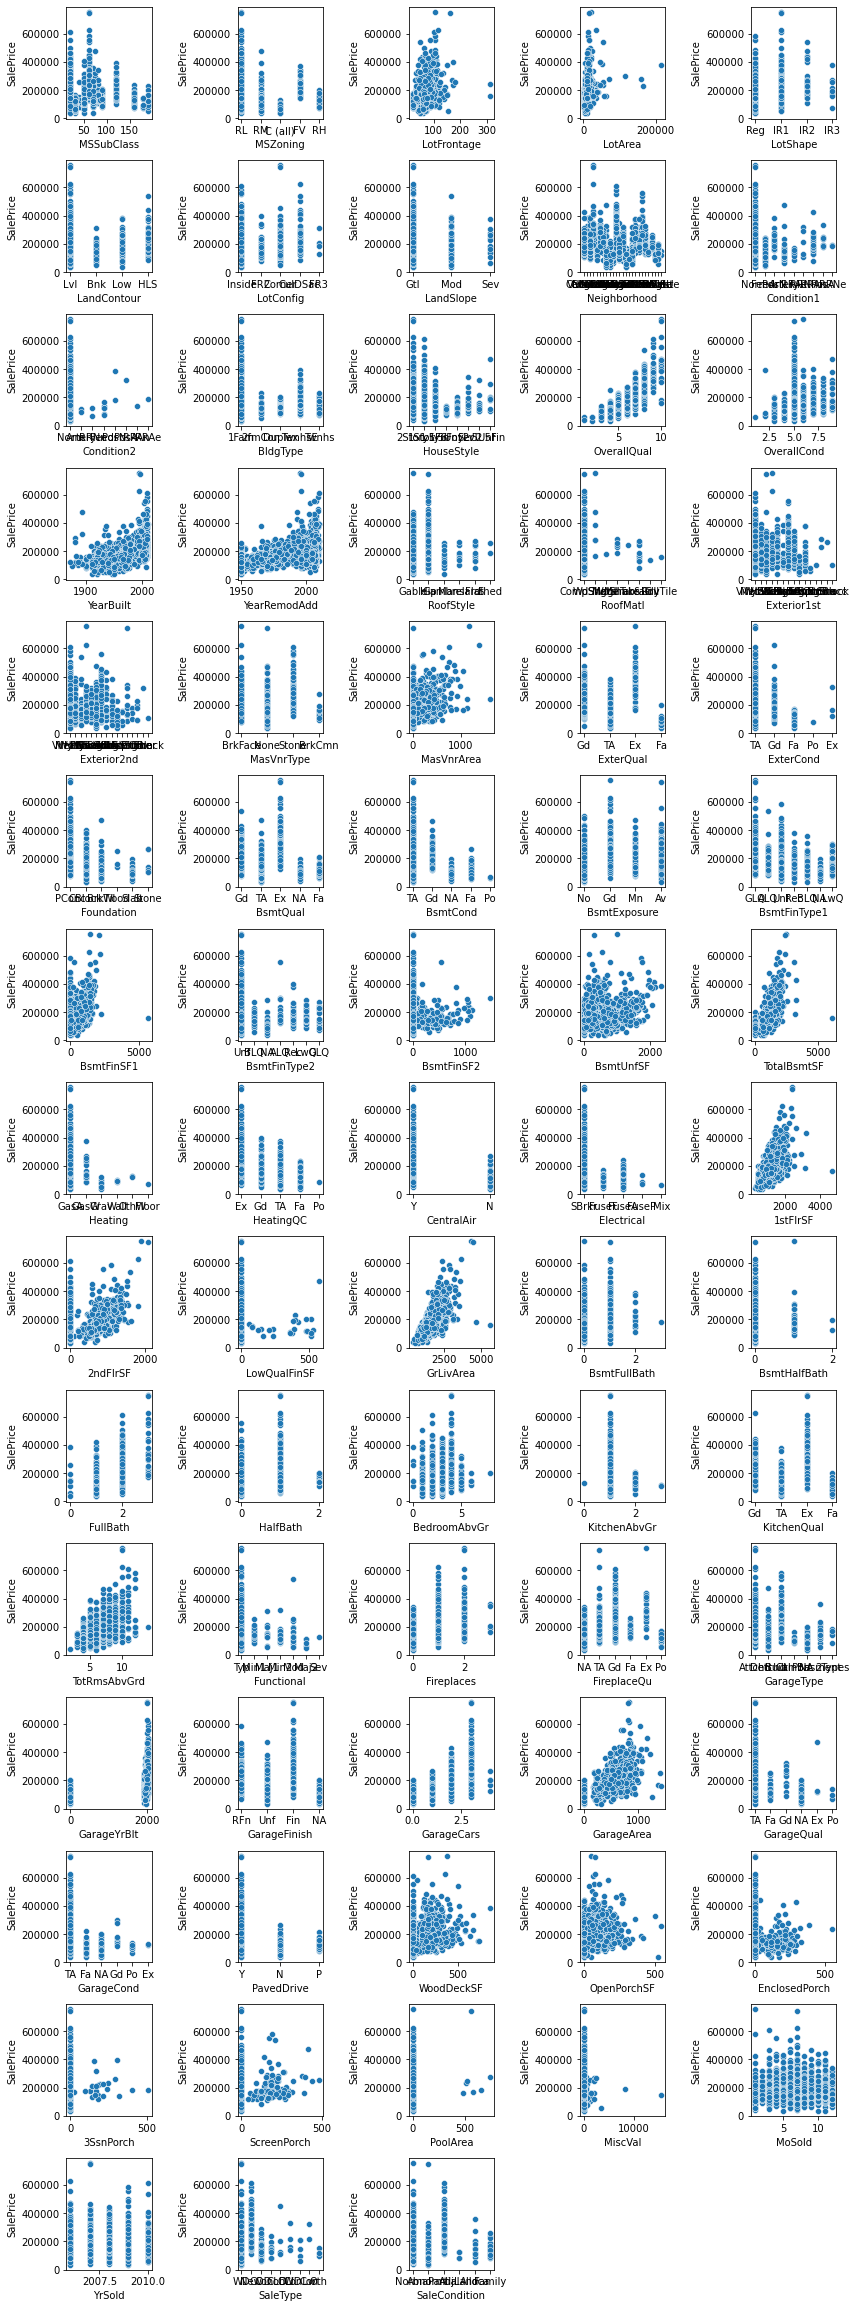

In [55]:
fig = plt.subplots(figsize=(12, 36))
i=0
for j, feature in enumerate(housing.columns):
    if feature not in ['Id', 'SalePrice']:
        i += 1
        plt.subplot(17, 5, i)
        sns.scatterplot(x=housing[feature], y=housing['SalePrice'])
        plt.tight_layout()

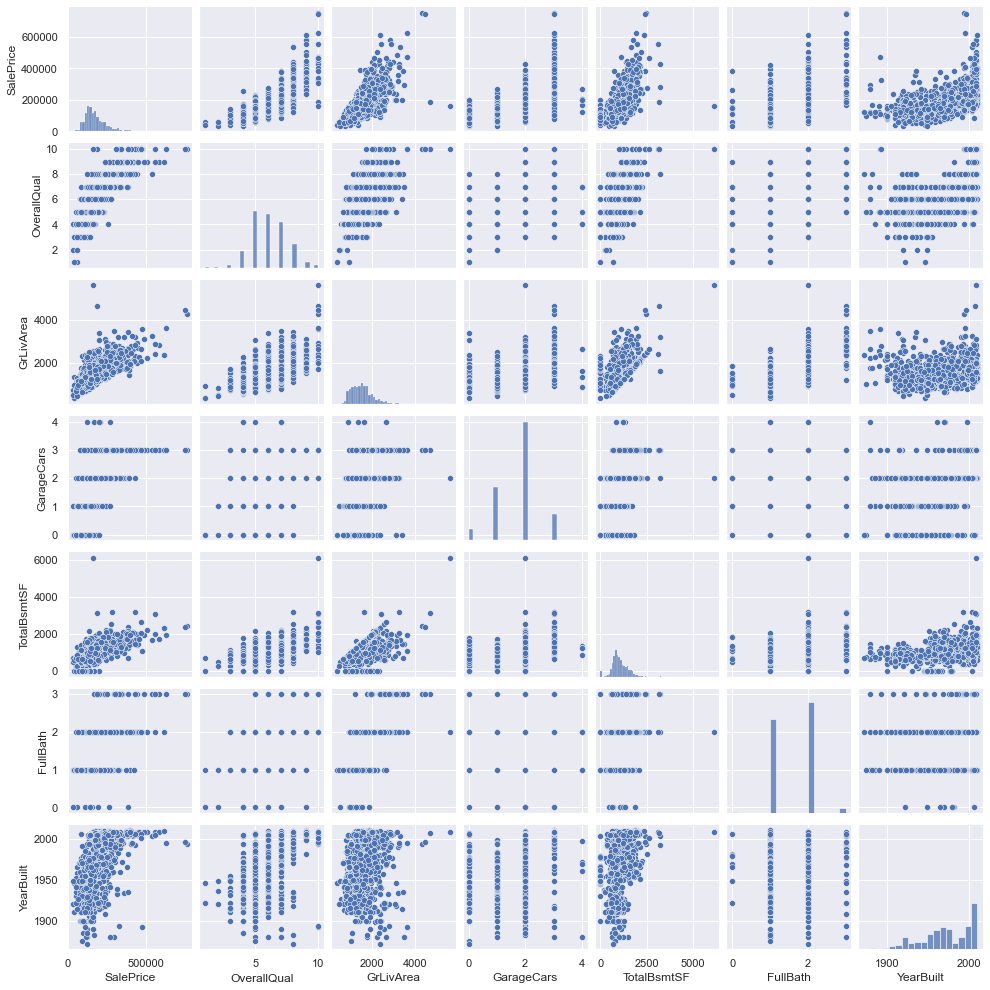

In [56]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(housing[cols],height = 2)
plt.show()

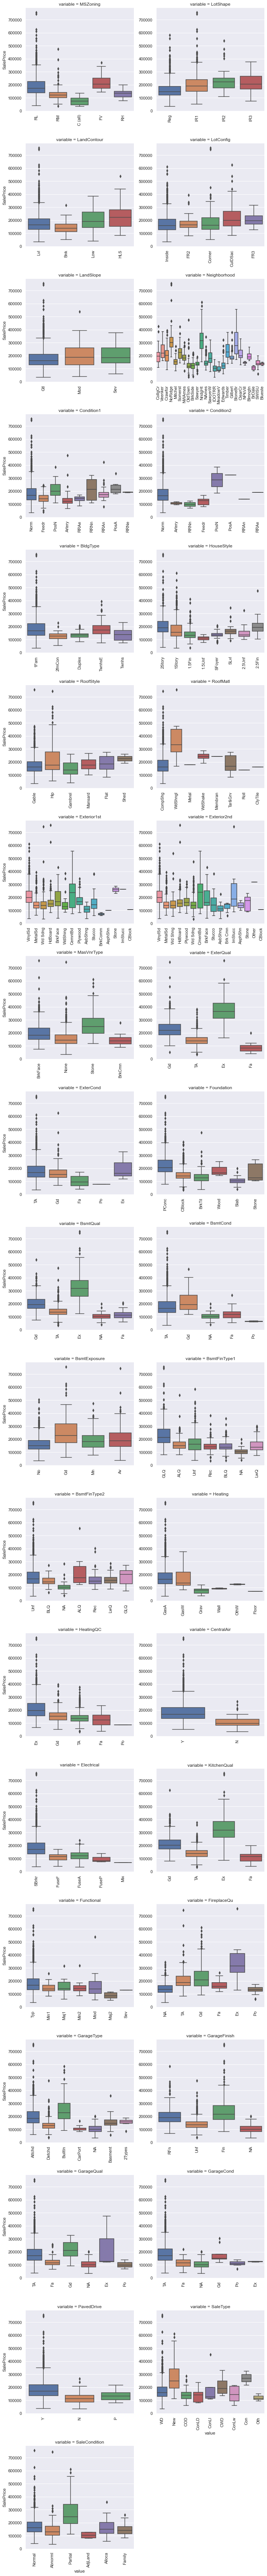

In [57]:
qualitative = [f for f in housing.columns if housing.dtypes[f] == 'object']

for c in qualitative:
    housing[c] = housing[c].astype('category')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, "value", "SalePrice")

# Plotting Categorical Features with Sale Price
#def facetgrid_boxplot(x, y, **kwargs):
 #   sns.boxplot(x=x, y=y)
  #  x=plt.xticks(rotation=90)
    
#categorical = housing.select_dtypes(exclude=['int64','float64'])
#f = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(housing[categorical.columns]))
#g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False, size=5)
#g = g.map(facetgrid_boxplot, "value", "SalePrice")

There are a few outliers which we would handle later.
From the above box plots we see that:-

- Paved drive properties demand a higher price.
- Houses where the basement quality is good and excellent are sold at higher prices compared to others.
- Houses with good and excelent garages are sold at higher prices.
- Houses with good quality kitchens also impact the price in a postive way.

## Let's create Dummy Variables for catageorical variables

In [58]:
housing_categorical = housing.select_dtypes(include=['category'])
housing_categorical.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [59]:
housing_dummies = pd.get_dummies(housing_categorical,drop_first=True)

In [60]:
# Dropping all categorical variables
housing = housing.drop(list(housing_categorical.columns),axis=1)
# concat dummy variables with housing dataset
housing = pd.concat([housing, housing_dummies], axis=1)

In [61]:
#let's convert below variables to cateorical types
housing['MSSubClass']=housing['MSSubClass'].astype('category')
housing['OverallQual']=housing['OverallQual'].astype('category')
housing['OverallCond']=housing['OverallCond'].astype('category')

In [62]:
#let's check the dataframe again
housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


All the EDA part is complete.Let's prepare data for model building now.

## Data preparation for model building

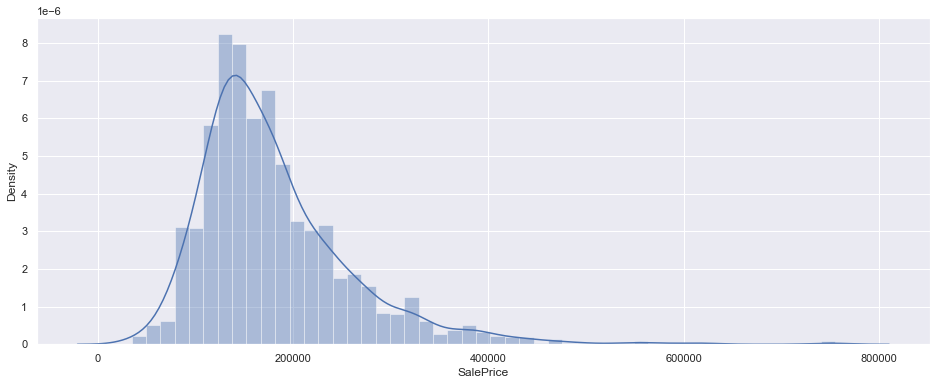

In [63]:
#let's analyze our target variable first
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

We can clearly see that Sale price is left skewed. Let's apply log transformation on this

In [64]:
#log transformation
housing['SalePrice']= np.log(housing['SalePrice'])

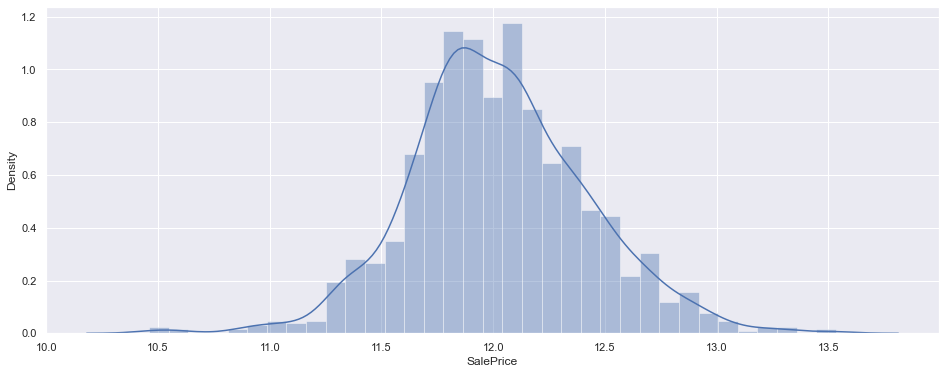

In [65]:
#let's analyze our target variable after transformation
plt.figure(figsize=(16,6))
sns.distplot(housing.SalePrice)
plt.show()

In [66]:
#scaling the data since sales price and other vairables are on a different scale. Dividing the data before scaling
df_train,df_test = train_test_split(housing,train_size=0.7,test_size=0.3,random_state=42)

In [67]:
y_train = df_train.pop('SalePrice')
#X_train = housing_train
y_test = df_test.pop('SalePrice')
#X_test = housing_test

In [68]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
 
X_train = std_scaler.fit_transform(df_train)
X_train = pd.DataFrame(X_train, columns=df_train.columns)

X_test = std_scaler.transform(df_test)
X_test = pd.DataFrame(X_test, columns=df_test.columns)

In [69]:
#let's analyze X_train for highly correlated data and drop those columns
#we will create a new dataframe after dropping all the highly correlated variables

df = pd.DataFrame(X_train)
#print(df.head())

cor_matrix = df.corr().abs()
#print(cor_matrix)
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.6)]
#print(); 
print(to_drop)
df1 = df.drop(columns=to_drop, axis=1)
#print(); 
print(df1.head())

['1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'MSZoning_RM', 'LandSlope_Sev', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_RRAe', 'BldgType_Duplex', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2Story', 'RoofStyle_Hip', 'RoofStyle_Shed', 'RoofMatl_Tar&Grv', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'MasVnrType_None', 'ExterQual_TA', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_NA', 'BsmtQual_TA', 'BsmtCond_NA', 'BsmtCond_TA', 'BsmtFinType1_NA', 'BsmtFinType1_Unf', 'BsmtFinType2_NA', 'BsmtFinType2_Unf', 'Heating_GasW', 'KitchenQual_Gd', 'KitchenQual_TA', 'FireplaceQu_NA', 'GarageType_Detchd', 'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_Unf', 'GarageQual_NA', 'GarageQual_TA', 'GarageCond_NA', 'GarageCond_T

In [70]:
#Dropping same columns from X_test also
X_test=X_test.drop(columns=to_drop, axis=1)

In [71]:
#copying the new dataframe back to X_train to keep naming convention clean
X_train=pd.DataFrame(df1)

## Ridge Regression

In [72]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [73]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009061,0.009640,0.002506,0.000449,0.0001,{'alpha': 0.0001},-0.110310,-0.117049,-0.116932,-0.117586,...,-0.115283,0.002699,27,-0.085768,-0.071586,-0.081702,-0.083565,-0.083334,-0.081191,0.004974
1,0.004209,0.000192,0.002170,0.000416,0.001,{'alpha': 0.001},-0.110310,-0.117049,-0.116932,-0.117586,...,-0.115283,0.002699,26,-0.085768,-0.071586,-0.081702,-0.083565,-0.083334,-0.081191,0.004974
2,0.003815,0.000360,0.001863,0.000381,0.01,{'alpha': 0.01},-0.110309,-0.117045,-0.116930,-0.117584,...,-0.115281,0.002698,25,-0.085768,-0.071586,-0.081702,-0.083565,-0.083334,-0.081191,0.004974
3,0.003910,0.000488,0.001918,0.000320,0.05,{'alpha': 0.05},-0.110306,-0.117031,-0.116922,-0.117573,...,-0.115273,0.002695,24,-0.085769,-0.071587,-0.081701,-0.083566,-0.083334,-0.081191,0.004974
4,0.003673,0.000462,0.002334,0.001135,0.1,{'alpha': 0.1},-0.110302,-0.117014,-0.116913,-0.117560,...,-0.115263,0.002692,23,-0.085770,-0.071588,-0.081700,-0.083567,-0.083334,-0.081192,0.004973


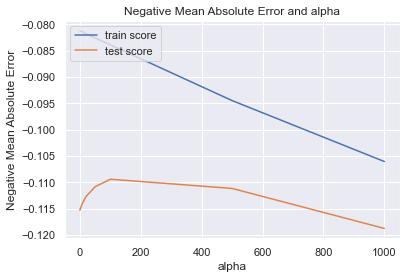

In [74]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [75]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [76]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.78950958e-02  5.86893505e-03  1.87160942e-02  8.35462922e-02
  2.80881718e-02  3.36748125e-02  3.53586868e-02  7.95077663e-03
  2.67481298e-02  9.28355072e-03  1.35909163e-02  4.41598611e-02
  4.96318446e-02  1.44670892e-02 -6.77171310e-03  1.64905425e-02
  2.94305217e-02 -1.89223583e-03  2.37850187e-02  3.63981937e-02
  1.73519008e-02  2.31186702e-03  8.18766295e-03  8.19149522e-03
  1.48827260e-02 -8.59678801e-03 -3.04022163e-03  3.40867486e-03
 -2.98383113e-03  1.70972937e-02  3.76868455e-03  1.71470190e-02
  5.99964204e-03 -1.53560747e-02 -3.91300727e-03  1.60743611e-02
  5.91031374e-03  1.74085335e-02  1.02519601e-02 -7.92956165e-03
 -5.47657008e-03 -2.75984563e-03  4.61647985e-03 -1.98099451e-03
 -9.28440067e-03 -5.34259641e-04  5.28409196e-03 -8.07112727e-03
  1.73149436e-02 -2.04082485e-02 -9.45854234e-03 -1.52186109e-02
 -1.88346666e-02 -4.17805028e-03 -1.75633320e-02  4.46927647e-03
 -2.28213952e-03  1.44571139e-02  3.01915550e-02 -1.10822849e-02
 -2.15539440e-03 -8.88654

In [77]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9038504761252895
0.8636909230724341
15.231462625589982
10.128448723717938
0.014918180828197828
0.023124312154607165


## Few important metrics plotted below

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

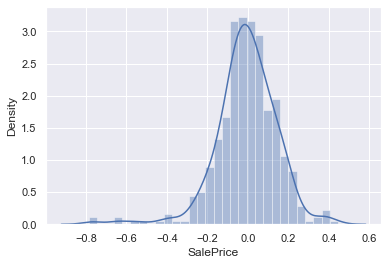

In [78]:
#Plotting the residuals for lasso
residual = y_test - y_pred_test
sns.distplot(residual)

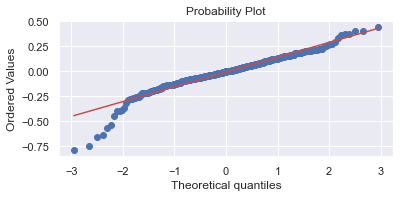

In [79]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

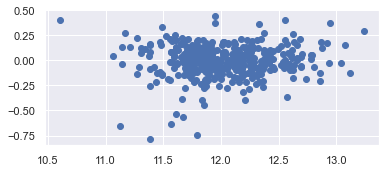

In [80]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, residual)

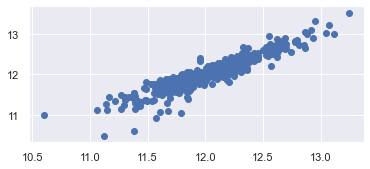

In [81]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, y_test)

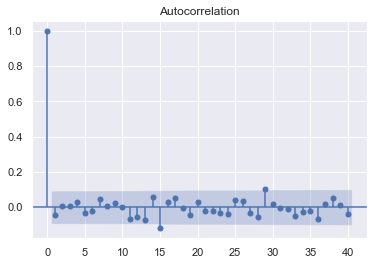

In [82]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

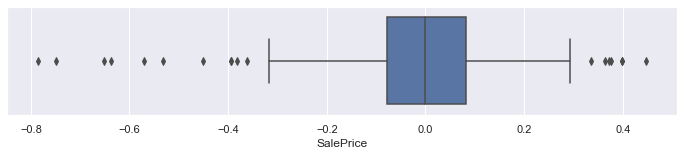

In [83]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

## Lasso Regression

In [84]:
#Lasso
lasso = Lasso()

# cross validation
folds=10
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


In [86]:
#Fitting Lasso model

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [87]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9052874236476287
0.8619219077241829
15.003829543288237
10.259895445022885
0.014695229719185346
0.02342441882425316


### Final metrics with both Ridge and Lasso values

In [88]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.903850,0.905287
1,R2 Score (Test),0.863691,0.861922
2,RSS (Train),15.231463,15.003830
3,RSS (Test),10.128449,10.259895
4,MSE (Train),0.122140,0.121224
5,MSE (Test),0.152067,0.153050


## Few important metrics plotted below for Lasso model

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

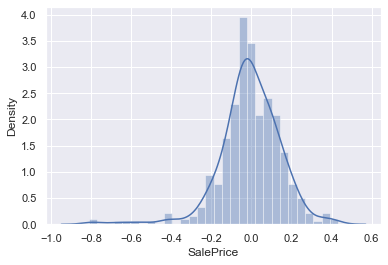

In [89]:
#Plotting the residuals for lasso
residual = y_test - y_pred_test
sns.distplot(residual)

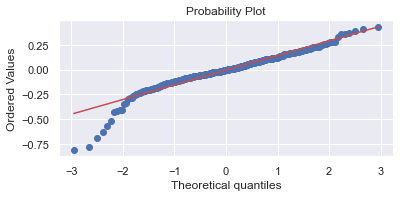

In [90]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

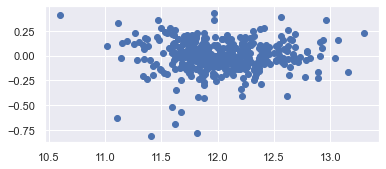

In [91]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, residual)

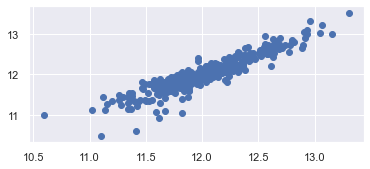

In [92]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred_test, y_test)

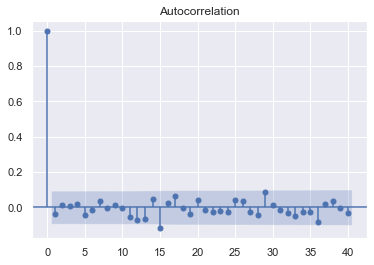

In [93]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()

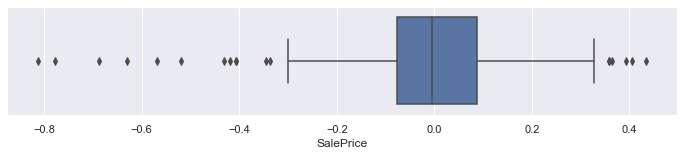

In [94]:
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=residual,whis=1.5)

## Lets observe the coefficients after regularization

In [95]:
betas = pd.DataFrame(index=X_test.columns)

In [96]:
betas.rows = X_test.columns

In [97]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

### Top coeffcients of Ridge

In [98]:
betas.sort_values(by=['Ridge'],ascending=False, inplace=True)
betas['Ridge'].head(10)

OverallQual             0.083546
2ndFlrSF                0.049632
TotalBsmtSF             0.044160
GarageYrBlt             0.036398
YearRemodAdd            0.035359
YearBuilt               0.033675
Neighborhood_NridgHt    0.030192
BedroomAbvGr            0.029431
OverallCond             0.028088
BsmtFinSF1              0.026748
Name: Ridge, dtype: float64

### Top coeffcients of Lasso

In [99]:
betas.sort_values(by=['Lasso'],ascending=False, inplace=True)
betas['Lasso'].head(10)

OverallQual             0.100889
2ndFlrSF                0.069849
TotalBsmtSF             0.063534
YearBuilt               0.048723
GarageYrBlt             0.039322
YearRemodAdd            0.036906
Neighborhood_NridgHt    0.033492
OverallCond             0.031690
BedroomAbvGr            0.027260
Neighborhood_StoneBr    0.025570
Name: Lasso, dtype: float64

## Final conclusion

Below are the most important factors which influence the house prices:

- OverallQual
- 2ndFlrSF
- TotalBsmtSF
- YearBuilt
- GarageYrBlt
- YearRemodAdd
- Neighborhood_NridgHt
- OverallCond
- BedroomAbvGr
- Neighborhood_StoneBr

# Subjective Questions

## Question 1: Taking double the value of alpha

### Ridge

In [100]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.23785295e-02  7.65046414e-03  1.76746172e-02  7.56243170e-02
  2.45143318e-02  2.79086649e-02  3.41451155e-02  1.08695371e-02
  2.48297885e-02  8.15015502e-03  1.25925518e-02  4.08111797e-02
  4.24013366e-02  1.27323600e-02 -5.92947824e-03  1.74600516e-02
  2.89812186e-02 -1.57701620e-03  2.56669236e-02  3.38914641e-02
  1.77976505e-02  4.02415201e-03  6.48197369e-03  7.60890190e-03
  1.39235188e-02 -6.80019033e-03 -2.39016735e-03  3.52304454e-03
 -2.47636987e-03  1.59510039e-02  3.03171396e-03  1.63551946e-02
  6.08097255e-03 -1.39996866e-02 -4.43397886e-03  1.36065721e-02
  4.18940369e-03  1.27620481e-02  1.00388695e-02 -7.22497171e-03
 -4.09160339e-03 -2.43905594e-03  4.02703785e-03 -2.00569804e-03
 -9.68209885e-03 -1.14025732e-03  5.73197491e-03 -5.76355548e-03
  1.72300355e-02 -1.88796109e-02 -7.89343379e-03 -1.41694541e-02
 -1.85609050e-02 -3.22641305e-03 -1.53252744e-02  3.85047373e-03
 -5.57507351e-04  1.55973355e-02  2.88704466e-02 -9.68534915e-03
 -1.52674892e-03 -7.99822

In [101]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.899197002989346
0.8655449988431245
15.968639465297153
9.990681585999699
0.015640195362680857
0.022809775310501594


### Lasso

In [102]:
#Fitting Lasso model

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [103]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9012855524423764
0.8660690611882149
15.637783298219492
9.951741122826434
0.015316144268579326
0.022720870143439348


In [105]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table )

rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.899197,0.901286
1,R2 Score (Test),0.865545,0.866069
2,RSS (Train),15.968639,15.637783
3,RSS (Test),9.990682,9.951741
4,MSE (Train),0.125061,0.123758
5,MSE (Test),0.151029,0.150734


In [106]:
betas = pd.DataFrame(index=X_test.columns)

In [107]:
betas.rows = X_test.columns

In [108]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [109]:
betas.sort_values(by=['Ridge'],ascending=False, inplace=True)
betas['Ridge'].head(10)

OverallQual             0.075624
2ndFlrSF                0.042401
TotalBsmtSF             0.040811
YearRemodAdd            0.034145
GarageYrBlt             0.033891
BedroomAbvGr            0.028981
Neighborhood_NridgHt    0.028870
YearBuilt               0.027909
Fireplaces              0.025667
BsmtFinSF1              0.024830
Name: Ridge, dtype: float64

In [110]:
betas.sort_values(by=['Lasso'],ascending=False, inplace=True)
betas['Lasso'].head(10)

OverallQual             0.106638
2ndFlrSF                0.064174
TotalBsmtSF             0.061013
YearBuilt               0.046180
YearRemodAdd            0.038950
GarageYrBlt             0.038525
Neighborhood_NridgHt    0.032754
OverallCond             0.028637
Fireplaces              0.028216
BedroomAbvGr            0.026822
Name: Lasso, dtype: float64

## Question 3: Drop 5 top predictors

In [111]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family
0,-0.868006,0.428201,-0.031106,0.636468,0.391626,-0.031237,-0.710647,1.061006,-0.971407,-0.280483,...,-0.062715,-0.044302,-0.083086,-0.031311,-0.054286,-0.299412,-0.031311,-0.062715,-0.070152,-0.130124
1,2.885732,-1.525298,-0.624789,-0.822194,-0.508937,1.107784,0.977287,-0.144469,0.218347,-0.280483,...,-0.062715,-0.044302,-0.083086,-0.031311,-0.054286,-0.299412,-0.031311,-0.062715,-0.070152,-0.130124
2,0.070429,0.080912,-0.186479,0.636468,-0.508937,1.237958,1.170193,-0.608113,-0.919206,-0.280483,...,-0.062715,22.572107,-0.083086,-0.031311,-0.054286,-0.299412,-0.031311,-0.062715,-0.070152,-0.130124
3,-0.868006,0.601845,0.081010,2.095130,-0.508937,1.140328,1.025513,1.142144,-0.971407,-0.280483,...,-0.062715,-0.044302,-0.083086,-0.031311,-0.054286,-0.299412,-0.031311,-0.062715,-0.070152,-0.130124
4,0.070429,-1.178009,-0.007535,0.636468,0.391626,0.814893,0.543247,-0.608113,-0.134012,1.994578,...,-0.062715,-0.044302,-0.083086,-0.031311,18.421003,-0.299412,-0.031311,-0.062715,-0.070152,-0.130124


In [112]:
X_train1= X_train.drop(['OverallQual','2ndFlrSF','TotalBsmtSF','GarageYrBlt','YearRemodAdd'],axis=1)
X_test1= X_test.drop(['OverallQual','2ndFlrSF','TotalBsmtSF','GarageYrBlt','YearRemodAdd'],axis=1)

In [113]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train1, y_train)
print(ridge.coef_)

[ 5.60005843e-03  1.48988810e-02  1.83585669e-02  4.36950644e-02
  5.34815958e-02  2.02158915e-02  5.58234244e-02  1.79897573e-02
  5.11503747e-02  1.56425910e-02 -7.17022898e-03  3.64783011e-02
  4.68029964e-02 -5.93990048e-03  3.83313524e-02  2.38296089e-02
  6.46711374e-03  1.17125647e-02  8.41367328e-03  1.49497068e-02
 -1.34751788e-03 -4.18944248e-03  3.76230607e-03 -2.15180485e-03
  2.26378946e-02  3.85870213e-03  1.37232375e-02  7.75083190e-03
 -1.35887008e-02 -1.25147437e-03  1.96098739e-02  4.94392864e-03
  1.76282029e-02  1.33814629e-02 -7.87326462e-03 -5.64477409e-03
 -2.51455763e-03  4.19398204e-04 -1.62563737e-03 -9.56187106e-03
 -9.25597372e-03  5.64198869e-03 -6.18737248e-03  2.17294588e-02
 -3.50338851e-02 -8.59759500e-03 -2.29026768e-02 -3.25344274e-02
 -8.35581301e-03 -2.77665603e-02  7.45475957e-03 -5.28321353e-04
  2.20238701e-02  3.94919891e-02 -1.14497522e-02 -3.49014549e-04
 -1.50965751e-02 -4.65646454e-05  3.21499237e-02  5.45926259e-03
  1.00069122e-02 -1.71563

In [114]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train1)
y_pred_test = ridge.predict(X_test1)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.871636654408568
0.8290067881476623
20.33459368368061
12.705654072256415
0.019916350326817444
0.029008342630722408


In [115]:
#Fitting Lasso model

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train) 

Lasso(alpha=0.001)

In [116]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train1)
y_pred_test = lasso.predict(X_test1)

metric7 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric7.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric7.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric7.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric7.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric7.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric7.append(mse_test_lr**0.5)

0.8747735444637641
0.8277985245139721
19.837665340087714
12.795434126045993
0.019429642840438504
0.029213319922479438


In [117]:
betas = pd.DataFrame(index=X_test1.columns)

In [118]:
betas.rows = X_test1.columns

In [119]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

### Top coeffcients of Ridge

In [120]:
betas.sort_values(by=['Ridge'],ascending=False, inplace=True)
betas['Ridge'].head(5)

BsmtFinSF1      0.055823
YearBuilt       0.053482
BsmtUnfSF       0.051150
BedroomAbvGr    0.046803
OverallCond     0.043695
Name: Ridge, dtype: float64

### Top coeffcients of Lasso

In [121]:
betas.sort_values(by=['Lasso'],ascending=False, inplace=True)
betas['Lasso'].head(5)

YearBuilt       0.081480
BsmtFinSF1      0.076841
BsmtUnfSF       0.072146
OverallCond     0.056176
BedroomAbvGr    0.051612
Name: Lasso, dtype: float64